In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score


In [2]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('LG.csv')


In [3]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [5]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [6]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 8:2
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [8]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [9]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.2731846620998678
Coefficients: [0.00018755]
R-squared: 0.16431033144244456


In [11]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [12]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [13]:
# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# In ra các chỉ số đánh giá
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)


MSE: 0.033927102993702565
RMSE: 0.18419311331779634
MAPE: 0.4210282891662854


In [14]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [15]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[132505.14193702 132531.99024825 132558.83855948 132585.68687071
 132612.53518193 132639.38349316 132666.23180439 132693.08011562
 132719.92842685 132746.77673807 132773.6250493  132800.47336053
 132827.32167176 132854.16998298 132881.01829421 132907.86660544
 132934.71491667 132961.5632279  132988.41153912 133015.25985035
 133042.10816158 133068.95647281 133095.80478404 133122.65309526
 133149.50140649 133176.34971772 133203.19802895 133230.04634017
 133256.8946514  133283.74296263]


In [16]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [17]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [18]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

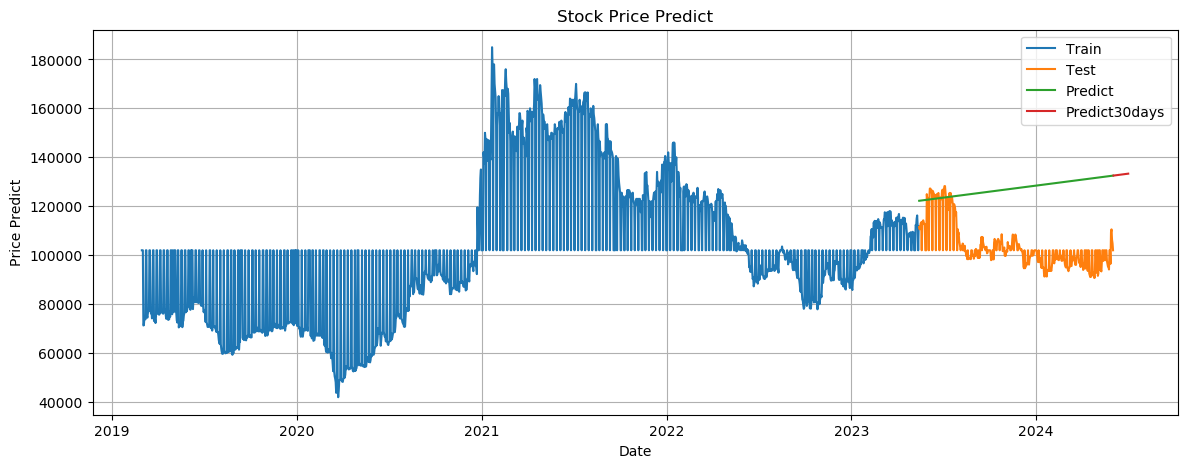

In [31]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [20]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [21]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[132505.14193702 132531.99024825 132558.83855948 132585.68687071
 132612.53518193 132639.38349316 132666.23180439 132693.08011562
 132719.92842685 132746.77673807 132773.6250493  132800.47336053
 132827.32167176 132854.16998298 132881.01829421 132907.86660544
 132934.71491667 132961.5632279  132988.41153912 133015.25985035
 133042.10816158 133068.95647281 133095.80478404 133122.65309526
 133149.50140649 133176.34971772 133203.19802895 133230.04634017
 133256.8946514  133283.74296263 133310.59127386 133337.43958509
 133364.28789631 133391.13620754 133417.98451877 133444.83283
 133471.68114122 133498.52945245 133525.37776368 133552.22607491
 133579.07438614 133605.92269736 133632.77100859 133659.61931982
 133686.46763105 133713.31594228 133740.1642535  133767.01256473
 133793.86087596 133820.70918719 133847.55749841 133874.40580964
 133901.25412087 133928.1024321  133954.95074333 133981.79905455
 134008.64736578 134035.49567701 134062.34398824 

In [22]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

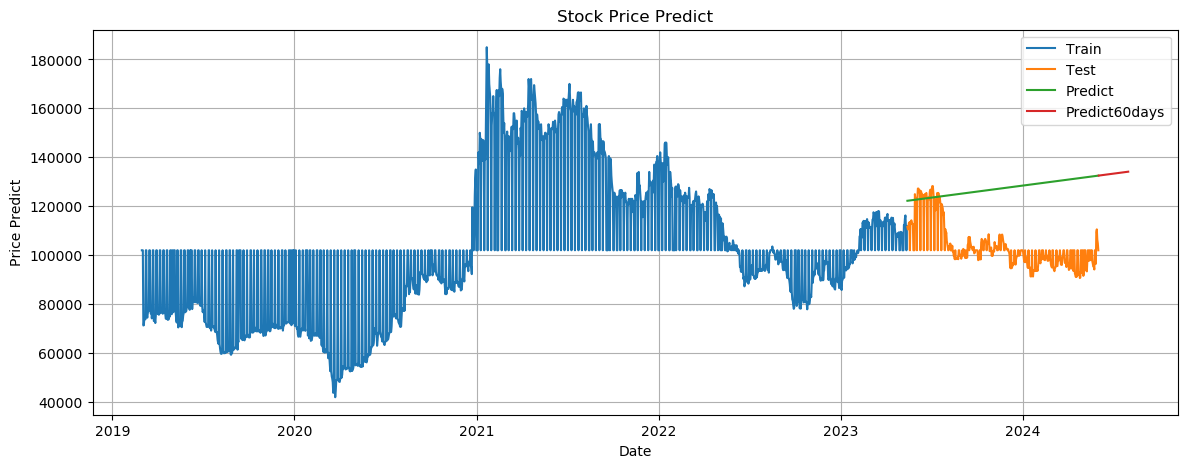

In [32]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [25]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [26]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

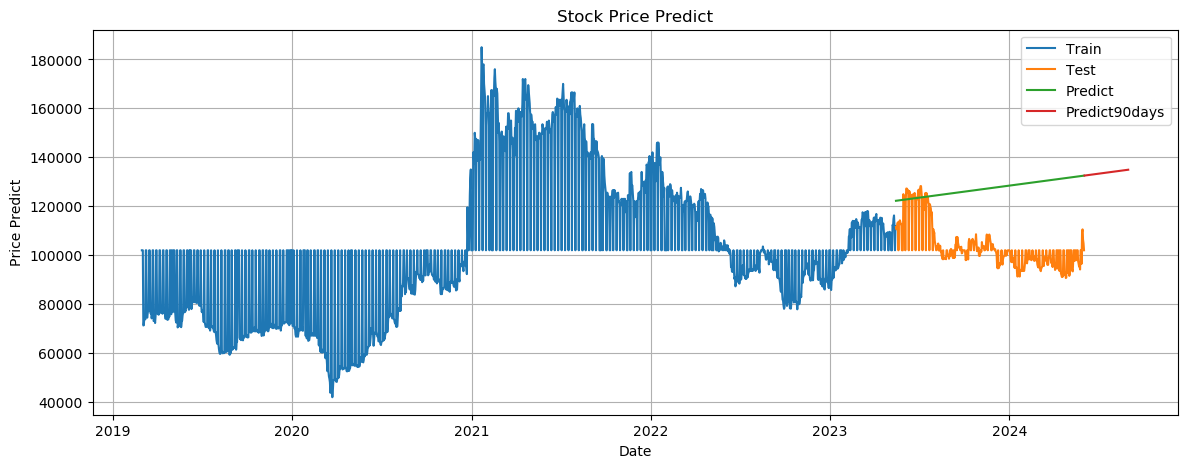

In [34]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()